In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from pprint import pprint
from matplotlib.lines import Line2D
from glob import glob 
import sys

from scipy.special import comb
from sklearn.decomposition import PCA

def plot_input_spikes(in_spikes, start_t, total_t, dt=1.0, img_shape=(28, 28), in_divs=(5, 3)):
    for lyr in sorted(in_spikes.keys()):
        s1 = in_spikes[lyr]
        w, h = img_shape if lyr < 2 else ((img_shape[0]//in_divs[0])+1, (img_shape[1]//in_divs[1])+1)
        num_images = int(np.ceil(total_t/float(dt)))
        imgs = [np.zeros((h, w)) for _ in range(num_images)]
        for idx, times in enumerate(s1):
            for t in sorted(times):
                r, c = int(idx//w), int(idx%w)
                if t < start_t or t>=start_t+total_t:
                    continue
                img_idx = int((t - start_t) // dt)
                if img_idx > num_images:
                    continue
                imgs[img_idx][r, c] += 1.0
        fw = 2
        plt.figure(figsize=(total_t*fw, fw))
        for idx, img in enumerate(imgs):
            ax = plt.subplot(1, total_t, idx+1)
            plt.imshow(img)
        plt.show()
        

In [2]:
base_dir = './L2L-OMNIGLOT/run_results/'
fname = os.path.join(base_dir, 'data_gen0_ind0.npz')
data = np.load(fname)

IOError: [Errno 2] No such file or directory: './L2L-OMNIGLOT/run_results/data_gen0_ind0.npz'

In [ ]:
2.0*np.pi

In [2]:
### variables
# learning rate, mean, deviation, LTD threshold
params = {
    "A_plus": 0.1,
    "A_minus": 0.001,
    "mean": 0.0,
    "std": 1.0,
    "displace": 0.01,
    "maxDt": 50.0,
}
rate = params['A_plus']
m = params['mean']
std = params['std']
var = (std)**2
neg_thr = params['displace']
x = np.arange(-params['maxDt'], params['maxDt'], 0.1)
y = rate * ((1./(np.sqrt(2.0 * np.pi) * std)) * np.exp((-(x - m)**2)/(var)) - neg_thr) #- params['A_minus']

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)

x = np.arange(-10.0, 10.0, 0.1)
y = rate * ((1./(np.sqrt(2.0 * np.pi) * std)) * np.exp((-(x - m)**2)/(var)) - neg_thr) #- params['A_minus']
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("learning_rule_full.svg")

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("learning_rule_zoom.svg")

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.0


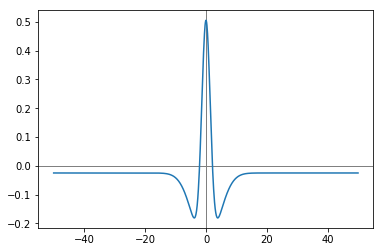

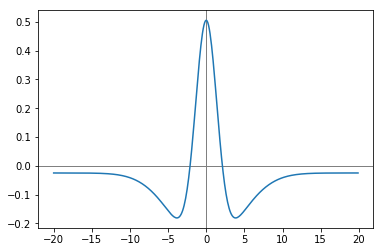

In [4]:
### variables
# learning rate, mean, deviation, LTD threshold
params = {
    "A_plus": 10.0,
    "A_minus": 0.001,
    "mean": 0.0,
    "std": 2.0,
    "displace": 0.0025,
    "maxDt": 50.0,
    "mult": 3.0,
}
rate = params['A_plus']
m = params['mean']
std = params['std']
var = (std)**2
varm = (params['mult']*std)**2
neg_thr = params['displace']
x = np.arange(-params['maxDt'], params['maxDt'], 0.1)
yp = (1./(2.0 * np.pi * std)) * np.exp((-(x - m)**2)/(var)) #- neg_thr #- params['A_minus']
ym = (1./(2.0 * np.pi * std * params['mult'])) * np.exp((-(x - m)**2)/(varm))# - neg_thr #- params['A_minus']
y = rate * (yp - ym - neg_thr)
print(np.sum(yp - ym))

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)

x = np.arange(-20.0, 20.0, 0.1)
yp = (1./(2.0 * np.pi * std)) * np.exp((-(x - m)**2)/(var)) #- neg_thr #- params['A_minus']
ym = (1./(2.0 * np.pi * std * params['mult'])) * np.exp((-(x - m)**2)/(varm))# - neg_thr #- params['A_minus']
y = rate * (yp - ym - neg_thr)

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)


plt.show()

set([1264, 1986, 1603, 1989, 1770, 1871, 1936, 1202, 1477, 1205, 1434, 1311, 1701])
13


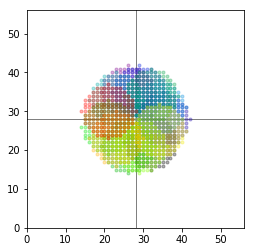

In [23]:
ndivs = 13
dang = (2.0 * np.pi) / ndivs
angles = np.arange(0.0, 2.0 * np.pi, dang)
radii = [7]#, 11, 17, 23, 31]
inw, inh = 56, 56
cr, cc = inh//2, inw//2
inf_r = 7


centers_i = set()
for r in radii:
    for a in angles:
        col = cc + int(np.round(r * np.cos(a))) 
        row = cr + int(np.round(r * np.sin(a))) 
        centers_i.add(row*inw + col)
print(centers_i)
centers_i_a = np.asarray(list(centers_i))
centers_r = centers_i_a // inw
centers_c = centers_i_a % inw


n_centers = len(centers_r)
print(n_centers)

gr = matplotlib.cm.rainbow
gr = matplotlib.cm.nipy_spectral
cmap_dc = gr.N//(n_centers + 1)
cmap = np.array([gr(i*cmap_dc) for i in range(n_centers+1)] )
cmap[:, 3] = 0.3


zones = {}
for zone_idx in range(n_centers):
    ir, ic = centers_r[zone_idx], centers_c[zone_idx]
    coords = zones.get(zone_idx, {'r': [], 'c': []})
    for dc in range(-inf_r, inf_r+1):
        for dr in range(-inf_r, inf_r+1):
            d = np.sqrt(dc**2 + dr**2)
            if d > inf_r:
                continue

            coords['r'].append(ir + dr)
            coords['c'].append(ic + dc)
                
    zones[zone_idx] = coords


fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.set_aspect('equal')
plt.axvline(cc, color='gray', linewidth=1.0)
plt.axhline(cr, color='gray', linewidth=1.0)
for idx in zones:
    plt.plot(zones[idx]['c'], zones[idx]['r'], '.', color=cmap[idx])

ax.set_xlim(0, inw)
ax.set_ylim(0, inh)
plt.show()

In [24]:
keys = data.keys()
print(keys)
# for k in keys:
#     print(k)
#     print(type(k))
#     print(data[k])

['recs', 'params', 'input', 'weights']


In [25]:
in_labels = data['input'].item()['labels']
print(in_labels)

BadZipfile: Truncated file header

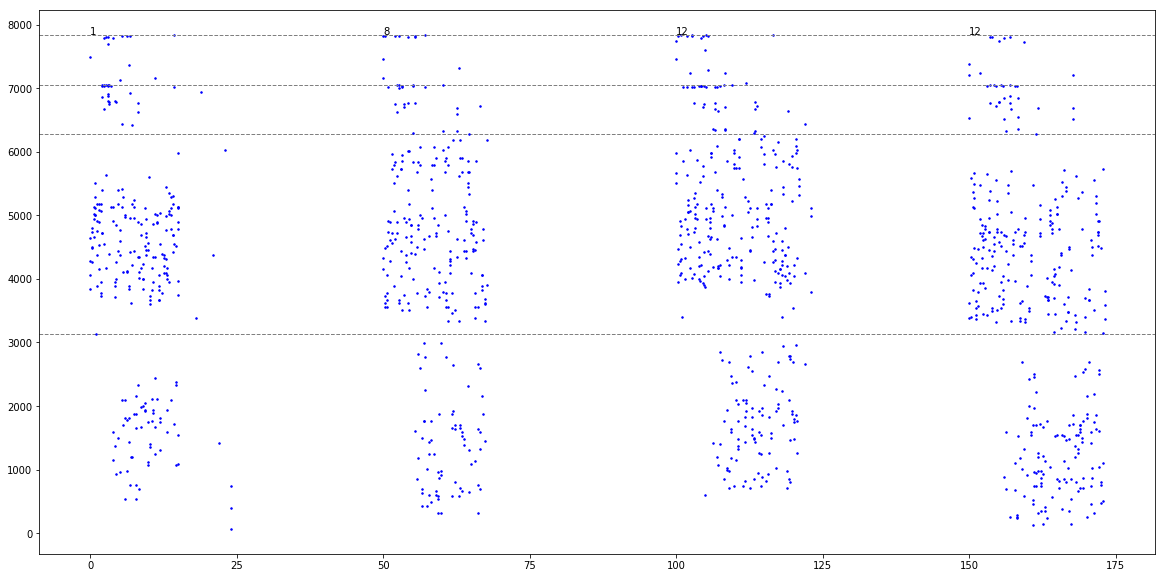

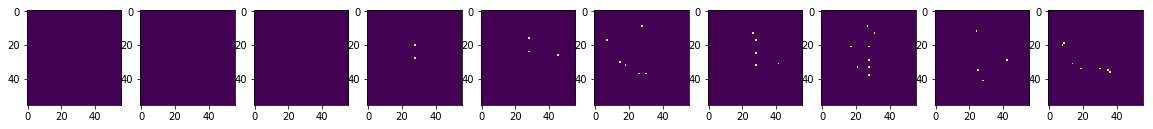

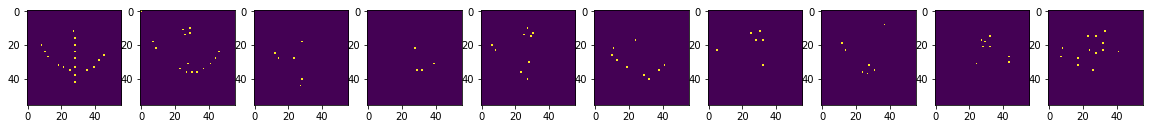

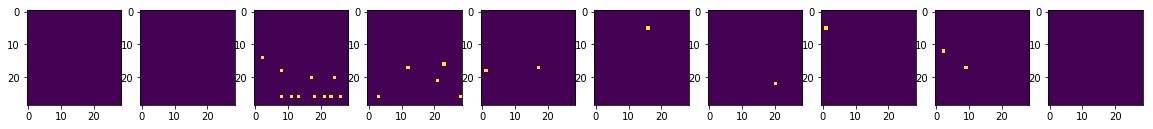

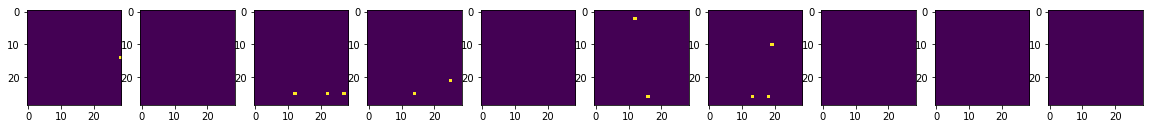

In [121]:
data = np.load('./L2L-OMNIGLOT/run_results/data_gen0_ind0.npz', allow_pickle=True)
in_shape = data['params'].item()['sim']['input_shape']
in_divs = data['params'].item()['sim']['input_divs']
in_spikes = data['input'].item()['spikes']
in_labels = data['input'].item()['labels']
dt = data['params'].item()['sim']['sample_dt']
count = 0
start_t = 1400
end_t = 1800
start_t = 0
end_t = 200
start_idx = start_t // dt
end_idx = end_t // dt
plt.figure(figsize=(20, 10))

for lyr in in_spikes:
    spk = in_spikes[lyr]
    for nid, times in enumerate(spk):
        if len(times):
            for t in times:
                if start_t <= t < end_t:
                    plt.plot(t, nid + count, '.b', markersize=3)
    count += len(spk)
    plt.axhline(count, color='gray', linestyle='--', linewidth=1.)

for t in np.arange(start_t, end_t, dt):
    try:
        plt.text(t, count, "%s"%in_labels[int(t//dt)])
    except:
        pass
    
plt.show()

plot_input_spikes(in_spikes, 0, 10, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1450, 5, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1500, 5, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1550, 5, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1600, 5, img_shape=in_shape, in_divs=in_divs)

PCA reduction 
---

In [4]:
# result_files = sorted(glob('./L2L-OMNIGLOT/run_results/*.npz'))
result_files = sorted(glob('/home/gp283/titan/run_results/*.npz'))
tmp = np.load(result_files[0], allow_pickle=True)
data = {}
for k in tmp:
    try:
        data[k] = tmp[k].item()
    except:
        data[k] = tmp[k]
# print( list(all_individuals[0]['params']['ind'].keys()) )
all_params = {k: [] for k in data['params']['ind'].keys() \
                      if not (k == 'w_max_mult')}

print(all_params)
fits = []
for rf in result_files[:]:
    try:
        tmp = np.load(rf, allow_pickle=True)
        data = {}
        for k in tmp:
            try:
                data[k] = tmp[k].item()
            except:
                data[k] = tmp[k]
    except:
        continue

    try:
        for k in all_params:
            all_params[k].append( data['params']['ind'][k] )
    except:
        del all_params[k]
        continue

    fit0 = 0.2 * data['analysis']['aggregate_per_class']['overlap_dist'] + \
           0.5 * data['analysis']['aggregate_per_class']['euc_dist'] + \
           0.2 * data['analysis']['aggregate_per_class']['class_dist']
    fit1 = data['analysis']['individual_per_class']['cos_dist']
    _fit = (fit0 + 0.1*fit1)#/2.0#     fs = all_params.get('fitness', [])
#     fs.append(_fit)
#     all_params['fitness'] = fs
    fits.append(_fit)
    
all_params['fit'] = fits
mtx_params = np.asarray([all_params[k] for k in sorted(all_params.keys())]).T
print(mtx_params.shape)
pca = PCA(n_components=3)
_params_pca = pca.fit_transform(mtx_params)
# _params_pca = pca.transform(mtx_params)
print(_params_pca.shape)



{'mushroom_weight': [], 'out_prob': [], 'out_weight': [], 'expand': [], 'conn_dist': [], 'A_plus': [], 'A_minus': [], 'exp_prob': [], 'w_min_mult': []}
(958, 10)
(958, 3)


In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
im = ax.scatter(_params_pca[:, 0], _params_pca[:, 1], _params_pca[:, 2],
                c=fits, 
                cmap='bwr_r',
#                vmin=0.0, vmax=2.0
                alpha=0.25
               )
cb = plt.colorbar(im)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output overlap plot
----

In [10]:
# result_files = sorted(glob('./L2L-OMNIGLOT/run_results/*.npz'))
# result_files = sorted(glob('./L2L-OMNIGLOT/almost_working_run_results/*.npz'))
# result_files = sorted(glob('./L2L-OMNIGLOT/run_results_no_learn_many_class/*.npz'))
result_files = sorted(glob('/home/gp283/titan/run_results/*.npz'))

plt.close('all')
for rf in result_files[-5:]:

    try:
        tmp = np.load(rf, allow_pickle=True)
        data = {}
        for k in tmp:
            try:
                data[k] = tmp[k].item()
            except:
                data[k] = tmp[k]
    except:
        continue
    
    n_class = data['params']['sim']['num_classes']
    dw = int(np.sqrt(n_class))
    dh = n_class // dw + int(n_class%dw > 0)
    
    vecs = data['analysis']['aggregate_per_class']['vectors']

    out_size = len(vecs[0])
    w = int(np.sqrt(out_size))
    h = out_size // w + int(out_size%w > 0)
    
    fw = 1.0
    fig = plt.figure(figsize=(w*fw, h*fw))

    overlap = np.zeros(out_size)
    for _class, v in enumerate(vecs):
        overlap += v

    overlap_len = np.sum(overlap > 0)
    overlap[:] = overlap > 1
    
    max_len = -1
    for _class, v in enumerate(vecs):
        whr = np.where(v > 0)[0]
        if len(whr) > max_len:
            max_len = len(whr)

        first_label = True
        for idx, on in enumerate(v):

                
            if on > 0:
                lbl = "%s"%(_class+1) if first_label else None
                first_label = False
                x, y = idx % w, idx // w
                dx = 0.5 * (1./ dw) * ((_class % dw) - (0.5*dw))
                dy = 0.5 * (1./ dh) * (-(_class // dw) + (0.5*dh))
                
                plt.plot(x+dx, y+dy, marker=r'$%s$'%(_class+1), label=lbl)

    for x in np.arange(-0.5, w+0.5, 1.0):
        plt.axvline(x, linewidth=1., color='gray')

    for y in np.arange(-0.5, h+0.5, 1.0):
        plt.axhline(y, linewidth=1., color='gray')
    
    plt.legend(bbox_to_anchor=(1., 1.025))
    plt.savefig('output_overlap.pdf')
    plt.show()
    
    print("max_len {} out of {}\n".format(max_len, out_size))
#     print(overlap)
    print(np.sum(overlap), overlap_len, 1.0 - np.sum(overlap)/overlap_len )
#     reduced_v = 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

max_len 7 out of 280

6.0 50 0.88


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

max_len 6 out of 280

4.0 48 0.9166666666666666


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

max_len 16 out of 280

7.0 52 0.8653846153846154


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

max_len 3 out of 280

0.0 12 1.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

max_len 7 out of 280

3.0 46 0.9347826086956522


histogram
----

In [11]:
result_files = sorted(glob('./L2L-OMNIGLOT/run_results/*.npz'))
# result_files = sorted(glob('./L2L-OMNIGLOT/almost_working_run_results/*.npz'))
# result_files = sorted(glob('../juelich/run_results/*.npz'))
# result_files = sorted(glob('../titan/run_results/*.npz'))
# result_files = sorted(glob('./L2L-OMNIGLOT/run_results_no_learn_many_class/*.npz'))
# result_files = sorted(glob('./L2L-OMNIGLOT/run_results_behaviour/*.npz'))

total_different = 1 #comb(14, 2)
total_same = 4 * 14 * 0.1
total = 1.1 #total_different + total_same

tmp = np.load(result_files[0], allow_pickle=True)
data = {}
for k in tmp:
    try:
        data[k] = tmp[k].item()
    except:
        data[k] = tmp[k]
# print( list(all_individuals[0]['params']['ind'].keys()) )
all_params = {k: [] for k in data['params']['ind'].keys() \
                      if not (k == 'w_max_mult')}
print(all_params)
all_scores = []
same_fit = {}
agr_fit = {}
fitnesses = {}
agg_euc = {}
agg_cos = {}
agg_ovr = {}
agg_rpr = {}
ind_cos = {}
distances = {}
print(distances)
sum_dist = {}
for rf in result_files[:]:
    sys.stdout.write("\r{}".format(rf))
    sys.stdout.flush()
    fn = os.path.basename(rf)
    fns = (fn.split('.')[0]).split('_')
    gen = int( fns[1].split('gen')[-1] )
    ind = int( fns[2].split('ind')[-1] )
    try:
        tmp = np.load(rf, allow_pickle=True)
        data = {}
        for k in tmp:
            try:
                data[k] = tmp[k].item()
            except:
                data[k] = tmp[k]
    except:
        print("Unable to open {}".format(rf))
        continue

    try:
        for k in all_params:
            all_params[k].append( data['params']['ind'][k] )
    except:
        del all_params[k]
        continue
    
    ag = data['analysis']['aggregate_per_class']['euc_dist']
    cg = data['analysis']['aggregate_per_class']['cos_dist']
    og = data['analysis']['aggregate_per_class']['overlap_dist']
    ig = data['analysis']['individual_per_class']['fitness']
    rg = data['analysis']['aggregate_per_class']['class_dist']
    
    fit0 = 0.2 * data['analysis']['aggregate_per_class']['overlap_dist'] + \
           0.5 * data['analysis']['aggregate_per_class']['euc_dist'] + \
           0.2 * data['analysis']['aggregate_per_class']['class_dist']
    fit1 = data['analysis']['individual_per_class']['cos_dist']
    _fit = (fit0 + 0.1*fit1)#/2.0
    all_scores.append(_fit)

    d = agg_rpr.get(gen, [])
    d.append(rg)
    agg_rpr[gen] = d

    d = agg_euc.get(gen, [])
    d.append(ag)
    agg_euc[gen] = d

    d = agg_cos.get(gen, [])
    d.append(cg)
    agg_cos[gen] = d
    
    d = agg_ovr.get(gen, [])
    d.append(og)
    agg_ovr[gen] = d
    
    d = ind_cos.get(gen, [])
    d.append(ig)
    ind_cos[gen] = d

    d = agr_fit.get(gen, [])
    d.append(cg)
    agr_fit[gen] = d

    d = same_fit.get(gen, [])
    d.append(ig)
    same_fit[gen] = d
    
    l = fitnesses.get(gen, [])
    l.append(_fit)
    
    fitnesses[gen] = l
    
    diff_class_vectors = data['analysis']['aggregate_per_class']['vectors']
    a = []
    for ix, x in enumerate(diff_class_vectors):
        for iy, y in enumerate(diff_class_vectors):
            if iy > ix:
                xnorm = x / np.sqrt(np.sum(x**2))
                ynorm = y / np.sqrt(np.sum(y**2))
                dot = np.sqrt(np.sum((xnorm - ynorm)**2)) / np.sqrt(2)
                a.append(dot)
    d = distances.get(gen, [])
    d.append(np.mean(a))
    distances[gen] = d

    
# distances[gen].append(0)
# fitnesses[gen].append(0)

print()
n_bins = int( np.ceil(total  / 5.0) + 1)
minimum = []
maximum = []
average = []
for g in fitnesses:
    minimum.append(np.min(fitnesses[g]))
    maximum.append(np.max(fitnesses[g]))
    average.append(np.mean(fitnesses[g]))

# print("fitnesses {}".format(fitnesses))
# print("agg_euc {}".format(agg_euc))
# print("agg_cos {}".format(agg_cos))
# print("agg_ovr {}".format(agg_ovr))
# print("agg_rpr {}".format(agg_rpr))
# print("ind_cos {}".format(ind_cos))

{'mushroom_weight': [], 'out_weight': [], 'expand': [], 'exp_prob': [], 'conn_dist': [], 'A_plus': [], 'A_minus': [], 'out_prob': [], 'w_min_mult': []}
{}
./L2L-OMNIGLOT/run_results/data_gen00000_ind00001.npz

/its/home/gp283/l2l-omniglot/venv3/lib/python3.5/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide
/its/home/gp283/l2l-omniglot/venv3/lib/python3.5/site-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in true_divide


./L2L-OMNIGLOT/run_results/data_gen00008_ind00008.npz


In [12]:
plt.close('all')
n_ind = len(fitnesses[0])
epochs = len(fitnesses)

ncols = epochs if epochs < 3 else 3
nrows =  epochs//ncols + int(epochs % ncols > 0)
fw = 7
n_bins = 25
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, 
                        figsize=(fw*ncols, fw*nrows*1.1), 
                        sharex=True, sharey=True
                       )
# print(axs)
plt.suptitle("Fitness histogram per generation\n")
for g in fitnesses:
#     if len(fitnesses[g]) < n_ind:
#         continue
#     ax = plt.subplot(nrows, ncols, g+1, sharex=True, sharey=True)
    if ncols == 1:
        ax = axs
    elif nrows == 1:
        ax = axs[g%ncols]
    else:
        ax = axs[g//ncols][g%ncols]

    ax.set_title("Gen %d   n_ind %d"%(g+1, len(fitnesses[g])))
    ax.set_xlim(0, 1.1)
    n_bins = 20
    ax.hist(fitnesses[g], bins=np.arange(n_bins)/float(n_bins))
#     ax.set_xticks(np.arange(0, total+11, 10))
    
plt.tight_layout()
plt.savefig("histogram_per_gen.pdf")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
# plt.close('all')
fig, ax = plt.subplots(1, 1)
# print(distances)
# print("fitnesses {}".format(fitnesses))
# print("agg_euc {}".format(agg_euc))
# print("agg_cos {}".format(agg_cos))
# print("agg_ovr {}".format(agg_ovr))
# print("ind_cos {}".format(ind_cos))
# print(agr_fit)

plt.axhline(0, color='gray', linewidth=0.5, linestyle='-')

for g in distances:
    plt.axvline(g, color='gray', linewidth=0.5, linestyle='-')
    plt.axvline(g + 0.25, color='gray', linewidth=0.5, linestyle='-')
    
    l = None if g > 0 else "Agg Euc"
    plt.plot(np.ones_like(agg_euc[g])*g, agg_euc[g], '.b', 
             label=l, markerfacecolor='none', alpha=0.5)

    l = None if g > 0 else "Agg Cos"
    plt.plot(np.ones_like(agg_cos[g])*(g+0.05), agg_cos[g], '.m', 
             label=l, markerfacecolor='none', alpha=0.5)
    
    l = None if g > 0 else "Agg Ovr"
    plt.plot(np.ones_like(agg_ovr[g])*(g+0.1), agg_ovr[g], '.c', 
             label=l, markerfacecolor='none', alpha=0.5)
    
    l = None if g > 0 else "Ind Cos"
    plt.plot(np.ones_like(ind_cos[g])*(g+0.15), ind_cos[g], '.g', 
             label=l, markerfacecolor='none', alpha=0.5)

    l = None if g > 0 else "Agg Repr"
    plt.plot(np.ones_like(agg_rpr[g])*(g+0.2), np.asarray(agg_rpr[g]), '.k', 
             label=l, markerfacecolor='none', alpha=0.5)

    l = None if g > 0 else "Fitness"
    plt.plot(np.ones_like(fitnesses[g])*(g+0.25), np.asarray(fitnesses[g]), '.r', 
             label=l, markerfacecolor='none', alpha=0.5)



ax.set_xlim(-1, len(distances) + 1)
ax.set_ylim(-0.1, 1.1)

ax.set_xlabel("Generation")
plt.legend()
plt.show()
# plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
fw = 8
fig = plt.figure(figsize=(fw*np.sqrt(2), fw))
ax = plt.subplot(1, 1, 1)



for g in fitnesses:
    plt.plot(g * np.ones_like(fitnesses[g]), fitnesses[g], '.b', alpha=0.1)

plt.plot(np.asarray(maximum), '^', linestyle=':', label='max')
plt.plot(np.asarray(average), 'o', linestyle='-', label='avg')
plt.plot(np.asarray(minimum), 'v', linestyle='-.', label='min')

plt.axhline(total, linestyle='--', color='magenta', linewidth=1)
plt.axhline(total_different, linestyle='--', color='magenta', linewidth=0.5)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
ax.set_xlabel('generation')
ax.set_ylabel('fitness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.025))
plt.tight_layout()
plt.savefig("fitness_per_generation.pdf")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [175]:
print("Normalized distance")
print(np.mean(distances[0]))
print(np.std(distances[0]))

print("Normalized fitness")
print(np.mean(fitnesses[0]))
print(np.std(fitnesses[0]))
print( np.std(distances[0]) / np.std(fitnesses[0]) )
print( np.std(fitnesses[0]) / np.std(distances[0]) )

Normalized distance
nan
nan
Normalized fitness
0.17700315715067688
0.30657846128507077
nan
nan


In [176]:
def clip_spikes(spikes, min_t, max_t):
    clipped_spikes = [[] for _ in spikes]

    for nid, ts in enumerate(spikes):
        times = np.array(ts)
        whr = np.where(np.logical_and(min_t <= times, times <= max_t))[0]
        if len(whr):
            clipped_spikes[nid][:] = times[whr].tolist()

    return clipped_spikes

    
def split_per_dt(spikes, start_t, end_t, dt):
    bin_edges = np.arange(start_t, end_t, dt)
    spikes_dt = [[[] for _ in spikes] for _ in range(len(bin_edges))]
    
    for nid, ts in enumerate(spikes):
        if len(ts):
            binned_time_indices = np.digitize(np.array(ts), bin_edges)
#             print(binned_time_indices)
            for time_idx, bin_idx in enumerate(binned_time_indices):
                spikes_dt[bin_idx-1][nid].append(ts[time_idx])
        
    return spikes_dt

def count_active_per_dt(split_spikes):
    count = []
    for spikes in split_spikes:
        count.append(np.sum([len(ts) for ts in spikes]))
    return count


result_files = sorted(glob('./L2L-OMNIGLOT/run_results/*.npz'))

mush_counts = []
out_counts = []
split_mush = []
count_mush = []
split_out = []
count_out = []
mush_spikes = []
out_spikes = []
for rf in result_files[:]:
    sys.stdout.write("\r{}".format(rf))
    sys.stdout.flush()

    tmp = np.load(rf, allow_pickle=True)
    data = {}
    for k in tmp:
        try:
            data[k] = tmp[k].item()
        except:
            data[k] = tmp[k]

    mush_spikes[:] = data['recs']['mushroom'][0]['spikes']
    out_spikes[:] = data['recs']['output'][0]['spikes']

    n_class = data['params']['sim']['num_classes']
    samp_dt = data['params']['sim']['sample_dt']
    end_t = data['params']['sim']['duration']
    n_test = data['params']['sim']['test_per_class']
#     start_t = 0
    start_t = end_t - n_class * n_test * samp_dt
#     print("Clipping Kenyon spikes")
    clip_mush = clip_spikes(mush_spikes, start_t, end_t)
# #     print("Splitting")
    split_mush = split_per_dt(clip_mush, start_t, end_t, samp_dt)
# #     print("Counting")
    count_mush = count_active_per_dt(split_mush)
    mush_counts.append(count_mush)
    
#     print("\nClipping Output spikes")
    clip_out = clip_spikes(out_spikes, start_t, end_t)
#     print(clip_out)
#     print("Splitting")
    split_out = split_per_dt(clip_out, start_t, end_t, samp_dt)
#     for ts in split_out:
#         print(ts)
    count_out = count_active_per_dt(split_out)
    out_counts.append(count_out)



./L2L-OMNIGLOT/run_results/data_gen00000_ind00000.npz

KeyError: 'mushroom'

In [11]:
mean_count_mush = [np.mean(sample) for sample in np.asarray(mush_counts).T]
norm_count_mush = [sample - mean_count_mush[i] for i, sample in enumerate(np.asarray(mush_counts).T)]
mean_norm_mush = np.asarray( [np.mean(run) for run in np.asarray(norm_count_mush).T] )
dev_norm_mush = np.asarray( [np.std(run) for run in np.asarray(norm_count_mush).T] )

fig, ax = plt.subplots(1, 1)

plt.fill_between(np.arange(len(mean_norm_mush)),
                 mean_norm_mush - dev_norm_mush,
                 mean_norm_mush + dev_norm_mush,
                alpha=0.5)
plt.plot(np.asarray(norm_count_mush).T, '.b', alpha=0.25)
plt.plot(mean_norm_mush, color='red', linewidth=3)
ax.set_title('Rate statistics (centerd at mean) - Kenyon')
ax.set_xlabel('Test number')
ax.set_ylabel('Rate distribution')
plt.savefig('rate_stats_kenyon.pdf')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
mean_count_out = [np.mean(sample) for sample in np.asarray(out_counts).T]
norm_count_out = [sample - mean_count_out[i] for i, sample in enumerate(np.asarray(out_counts).T)]
mean_norm_out = np.asarray( [np.mean(run) for run in np.asarray(norm_count_out).T] )
dev_norm_out = np.asarray( [np.std(run) for run in np.asarray(norm_count_out).T] )

fig, ax = plt.subplots(1, 1)

plt.fill_between(np.arange(len(mean_norm_out)),
                 mean_norm_out - dev_norm_out,
                 mean_norm_out + dev_norm_out,
                alpha=0.5)
plt.plot(np.asarray(norm_count_mush).T, '.b', alpha=0.25)
plt.plot(mean_norm_mush, color='red', linewidth=3)
ax.set_title('Rate statistics (centerd at mean) - Output')
ax.set_xlabel('Test number')
ax.set_ylabel('Rate distribution')
plt.savefig('rate_stats_output.pdf')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
sys.stdout.write("\nPlotting activity for Kenyon neurons\n")
sys.stdout.flush()
fig = plt.figure()
ax = plt.subplot(1,1,1)
tmp = np.asarray(mush_counts)
for i, c in enumerate(tmp.T):
    plt.plot(c, '.', label="sample {}".format(i+1))
ax.set_title("Kenyon Neurons - spike counts per test")
ax.set_xlabel("Test number")
ax.set_ylabel("Rate")
ax.margins(1.1, 1.1)
plt.savefig("kenyon-spikes-per-test-sample.pdf")





sys.stdout.write("\nPlotting activity for Output neurons\n")
sys.stdout.flush()
fig = plt.figure()
ax = plt.subplot(1,1,1)
tmp = np.asarray(out_counts)
for i, c in enumerate(tmp.T):
    plt.plot(c, '.', label="sample {}".format(i+1))
ax.set_title("Output Neurons - spike counts per test")
ax.set_xlabel("Test number")
ax.set_ylabel("Rate")
# plt.legend()
plt.savefig("output-spikes-per-test-sample.pdf")


plt.show()


Plotting activity for Kenyon neurons


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …


Plotting activity for Output neurons


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
fw = 8
fig = plt.figure(figsize=(fw*np.sqrt(2), fw))
ax = plt.subplot(1, 1, 1)



for g in fitnesses:
    plt.plot(g * np.ones_like(fitnesses[g]), fitnesses[g], '.b', alpha=0.1)

plt.plot(np.asarray(maximum), '^', linestyle=':', label='max')
plt.plot(np.asarray(average), 'o', linestyle='-', label='avg')
plt.plot(np.asarray(minimum), 'v', linestyle='-.', label='min')

plt.axhline(total, linestyle='--', color='magenta', linewidth=1)
plt.axhline(total_different, linestyle='--', color='magenta', linewidth=0.5)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
ax.set_xlabel('generation')
ax.set_ylabel('fitness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.025))
plt.tight_layout()
plt.savefig("fitness_per_generation.pdf")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [298]:
fw = 8
fig = plt.figure(figsize=(fw*np.sqrt(2), fw))
ax = plt.subplot(1, 1, 1)

plt.plot(np.asarray(maximum), '^', linestyle=':', label='max')

# plt.axhline(total, linestyle='--', color='magenta', linewidth=1)
plt.axhline(total_different, linestyle='--', color='magenta', linewidth=0.5)
ax.set_xlabel('generation')
ax.set_ylabel('fitness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.025))
plt.tight_layout()
plt.savefig("max_fitness_per_generation.pdf")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [299]:
n_ind = len(fitnesses[0])
epochs = len(fitnesses)
ncols = 3
nrows =  epochs//ncols + int(epochs % ncols > 0)
fw = 5
fig = plt.figure(figsize=(fw*ncols, fw*nrows))
plt.suptitle("Fitness histogram per generation\n")
for g in fitnesses:
#     if len(fitnesses[g]) < n_ind:
#         continue
    ax = plt.subplot(nrows, ncols, g+1)
    ax.set_title("Gen %d   n_ind %d"%(g+1, len(fitnesses[g])))
    plt.hist(fitnesses[g])#, bins=n_bins)
#     ax.set_xticks(np.arange(0, total+11, 10))
    
plt.tight_layout()
plt.savefig("histogram_per_gen.pdf")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Parameter pairs
---

In [287]:
scores = np.asarray(all_scores) 
keys = sorted(list(all_params.keys()))
n_params = len(keys)
n_figs = comb(n_params, 2)
n_cols = 3
n_rows = n_figs // n_cols + int(n_figs % n_cols > 0)
fw = 5.0
fig = plt.figure(figsize=(fw*n_cols*1.25, fw*n_rows))
plt_idx = 1
for i in range(n_params):
    for j in range(i+1, n_params):
        ax = plt.subplot(n_rows, n_cols, plt_idx)
        im  = plt.scatter(all_params[keys[i]], all_params[keys[j]],
                          c=scores, 
#                           s=(100.0 - scores)+ 5.0, 
#                           s=scores + 5.0, 
                          vmin=0.0, vmax=total,
                          cmap='bwr_r',
#                           alpha=0.15
                         )
        plt.colorbar(im)
        
        ax.set_xlabel(keys[i])
        ax.set_ylabel(keys[j])
        
        plt_idx += 1
plt.show()
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

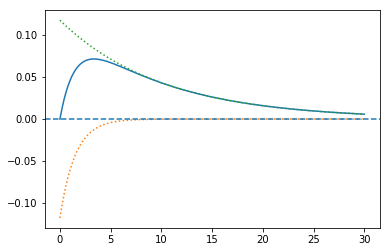

In [542]:
x = np.arange(0.0, 30.1, 0.1)
s = -(1.0/(10 - 1.5)) * np.exp(-x/1.5)
f = (1.0/(10 - 1.5)) * np.exp(-x/10.0)
v = f + s
plt.figure()
plt.plot(x, v)
plt.plot(x, s, linestyle=':')
plt.plot(x, f, linestyle=':')
plt.axhline(0, linestyle='--')
plt.show()

In [102]:
data = np.load('./run_results/data_gen0_ind0.npz')
data['params'].item()['ind']
data['params'].item()['sim']

FileNotFoundError: [Errno 2] No such file or directory: './run_results/data_gen0_ind0.npz'

In [5]:
data = np.load('./run_results/data_gen0_ind0.npz')
# data['params'].item()['ind']
# data['params'].item()['sim']
params = data['params'].item()
weights = data['weights'].item()
recordings = data['recs'].item()
    
print(weights.keys())
try:
    i2m = weights['input to mushroom']
    found = True
except:
    print("no weights in data")
    found = False

if found:
    for l in i2m:
        print(len(l))


    nz = data['input'].item()['n_zones']
    print(nz)
    total_mush = len(recordings['mushroom'][0]['spikes'])
    n_single = int(np.prod(nz[0]))
    n_per_zone = int(total_mush//nz['total'])
    width = params['sim']['input_shape'][1]

    img = np.zeros((width, width))
    lidx = 0
    for sp in range(0, total_mush, n_per_zone)[:n_single]:
        ep = sp + n_per_zone
        img[:] = 0

        for i in range(lidx, len(i2m[0])):
            pre, post, w, d = i2m[0][i]
            row, col = pre // width, pre % width
            img[row, col] += 1

            if post > ep:
                break
            lidx += 1


        print(w)
        fig = plt.figure()
        ax = plt.subplot(1, 1, 1)
        plt.imshow(img)
        plt.show()
        plt.close()


[u'mushroom to output']
no weights in data


In [6]:
x = [76,77,78,79,80,81,74,71,72,73,75,105,106,107,108,109,\
102,99,100,101,103,136,137,138,139,140,141,134,131,132,133,135,172,\
173,174,175,176,177,170,167,168,169,171,208,209,210,211,212,213,206,\
203,204,205,207,244,245,246,247,248,249,242,239,240,241,243,32,33,34,\
35,36,37,30,27,28,29,31,4,5,6,7,8,9,2,0,3,17,18,19,20,21,14,12,\
15,52,53,54,55,56,57,50,47,48,49,51]

pprint(np.array(sorted(x)))

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  17,
        18,  19,  20,  21,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  99, 100,
       101, 102, 103, 105, 106, 107, 108, 109, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249])


In [7]:
data = np.load('./run_results/data_gen0_ind0.npz')

use_gabor = data['params'].item()['sim']['use_gabor']
if use_gabor:
    recordings = data['recs'].item()
    gabor = recordings['gabor']

    n_layers = len(gabor.keys())
    fw = 2.0
    fig = plt.figure(figsize=(2*n_layers*fw, fw))
    for lyr in sorted(gabor.keys())[:]:
        ax = plt.subplot(1, n_layers, lyr+1)
        for r in sorted(gabor[lyr].keys())[:]:
            n_cols = len(gabor[lyr][r].keys())
            for c in gabor[lyr][r]:
                spikes = gabor[lyr][r][c]['spikes']
                n_neurons = len(spikes)
                for i, times in enumerate(spikes):
                    nid = r * n_cols * n_neurons + n_neurons * c + i
                    plt.plot(times, nid * np.ones_like(times), '.b', markersize=3)
    #         ax.set_ylim(-1, n_neurons * c + i + 1)
    plt.show()

(0.0, 50.0, 251.0)
(50.0, 100.0, 39.0)
(100.0, 150.0, 176.0)
(150.0, 200.0, 86.0)
(200.0, 250.0, 0.0)


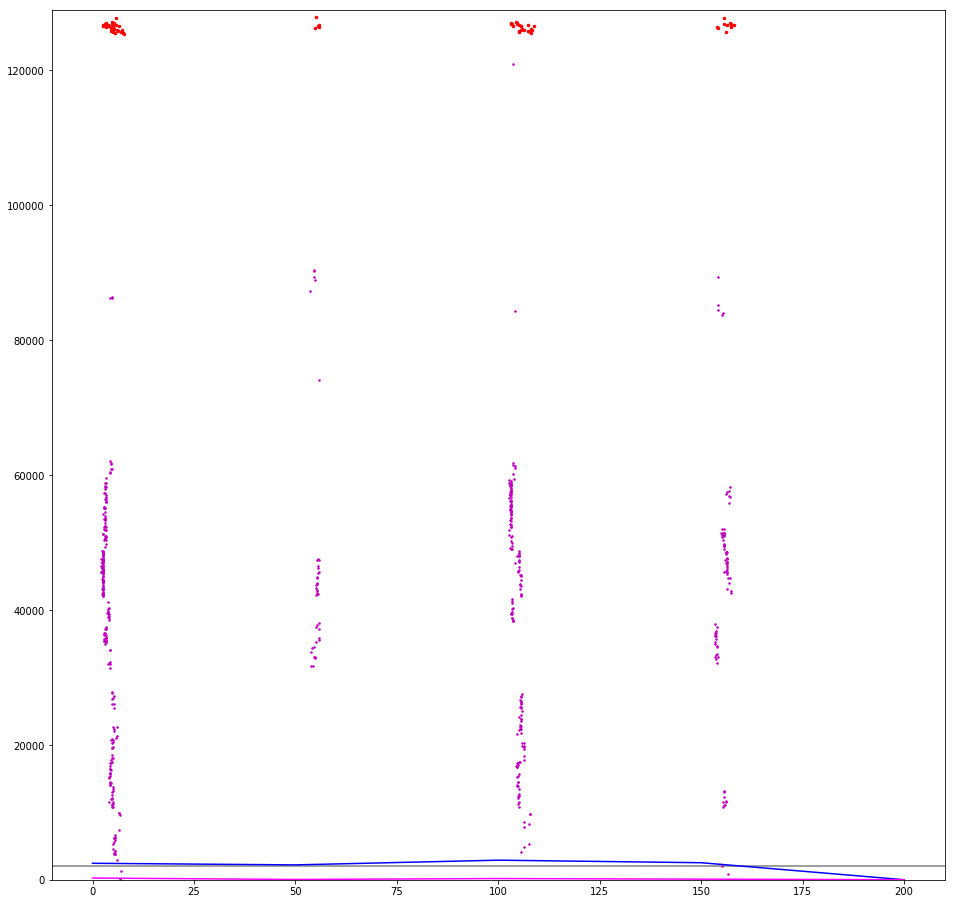

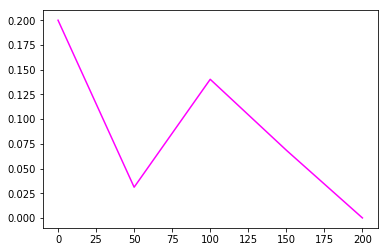

In [9]:
    data = np.load('./run_results/data_gen0_ind0.npz')
# try:



    n_out = data['params'].item()['sim']['output_size']
    n_test = data['params'].item()['sim']['test_per_class']
    n_classes = data['params'].item()['sim']['num_classes']
    n_out_per_class = n_out // n_classes
    dt = data['params'].item()['sim']['sample_dt']
    end_t = 210
    start_t = 0
    
    
    in_labels = data['input'].item()['labels']
    recordings = data['recs'].item()
    mush_spikes = recordings['mushroom'][0]['spikes']
    imush_spikes = recordings['inh_mushroom'][0]['spikes']
#     print(in_labels)
    n_mush = float(len(mush_spikes))

    in_spikes = data['input'].item()['spikes']
    in_rate = []
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        count = 0.0
        n_inputs = 0.0
        for lyr in in_spikes:
            for i, times in enumerate(in_spikes[lyr]):
                for t in times:
                    if st <= t < et:
                        count += 1.0
            n_inputs += i
        in_rate.append(count/n_inputs)

    out_rate = []
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        count = 0.0
        
        for i, times in enumerate(mush_spikes):
            for t in times:
                if st <= t < et:
                    count += 1.0
        print(st, et, count)
        out_rate.append(count)#/n_mush)

        
    plt.figure(figsize=(16, 16))
    ax = plt.subplot(1, 1, 1)
    plt.axhline(np.mean(in_rate)*len(mush_spikes), color='gray')
    plt.plot(np.arange(start_t, end_t, dt), np.asarray(in_rate) * n_mush, color='blue')
    plt.plot(np.arange(start_t, end_t, dt), np.asarray(out_rate), color='magenta')

    for i, times in enumerate(mush_spikes):
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.m', markersize=3)
    mj = 100
    for j, times in enumerate(imush_spikes):
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1+j*mj), '.r', markersize=5)
    
#     for t in np.arange(start_t, end_t, dt):
#         try:
#             plt.text(t, i*1.01, "%s"%in_labels[int(t//dt)])
#         except:
#             pass

#     plt.show()
    ax.set_ylim(-10, i+j*mj+10)
    plt.figure()
    plt.plot(np.arange(start_t, end_t, dt), (np.asarray(out_rate)/n_mush) *100, color='magenta')
    plt.show()
# except:
#     pass

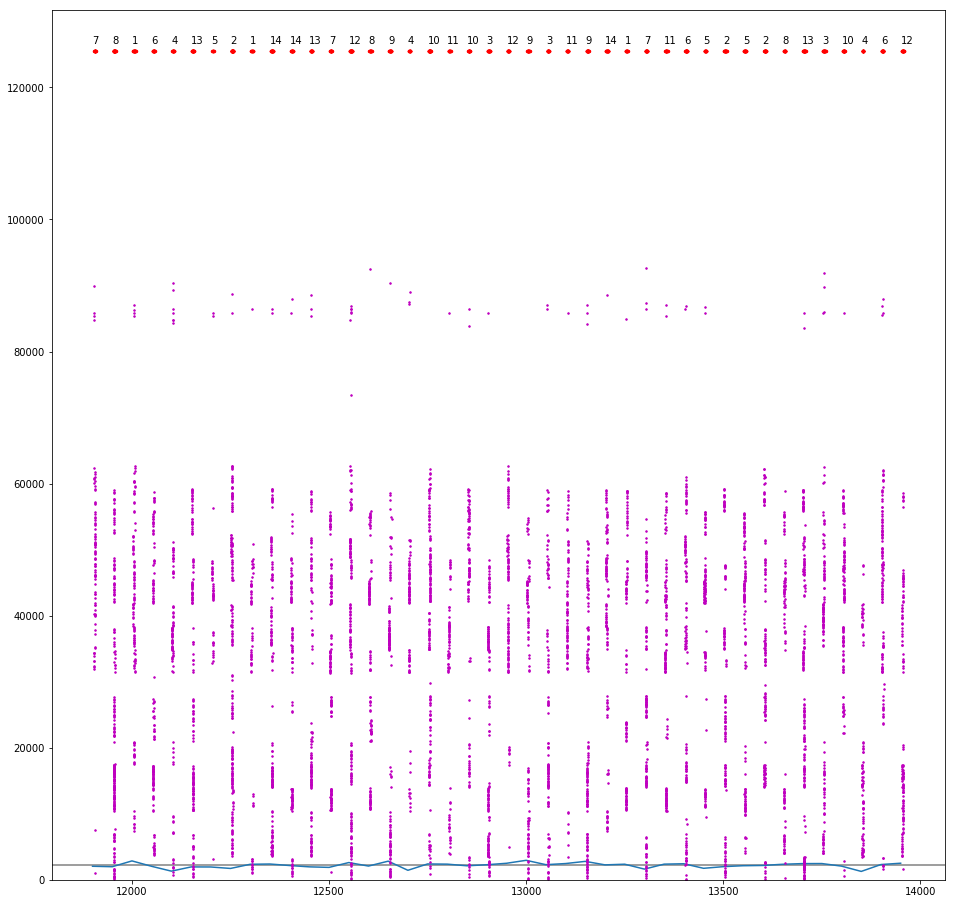

In [33]:
    data = np.load('./run_results/data_gen0_ind0.npz')
# try:
    n_out = data['params'].item()['sim']['output_size']
    n_test = data['params'].item()['sim']['test_per_class']
    n_classes = data['params'].item()['sim']['num_classes']
    n_out_per_class = n_out // n_classes
    dt = data['params'].item()['sim']['sample_dt']
    end_t = data['params'].item()['sim']['duration']
    start_t = end_t - n_classes * n_test * dt

    
    in_labels = data['input'].item()['labels']
    recordings = data['recs'].item()
    mush_spikes = recordings['mushroom'][0]['spikes']
    imush_spikes = recordings['inh_mushroom'][0]['spikes']
    
    

    in_spikes = data['input'].item()['spikes']
    in_rate = []
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        count = 0.0
        n_inputs = 0.0
        for lyr in in_spikes:
            for i, times in enumerate(in_spikes[lyr]):
                if times:
                    for t in times:
                        if st <= t < et:
                            count += 1.0
            n_inputs += i
        in_rate.append(count/n_inputs)
    
    
#     print(in_labels)
    plt.figure(figsize=(16, 16))
    

    ax = plt.subplot(1, 1, 1)
    
    plt.axhline(np.mean(in_rate)*len(mush_spikes), color='gray')
    plt.plot(np.arange(start_t, end_t, dt), np.asarray(in_rate) * len(mush_spikes))
    
    for i, times in enumerate(mush_spikes):
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.m', markersize=3)
    
    for times in imush_spikes:
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1), '.r', markersize=5)
    ax.set_ylim(0, len(mush_spikes)*1.05)
    
    for t in np.arange(start_t, end_t, dt):
        plt.text(t, i*1.01, "%s"%in_labels[int(t//dt)])

    plt.show()
# except:
#     print("mushroom spikes not found")

['input', 'recs', 'params', 'weights']
125440
10


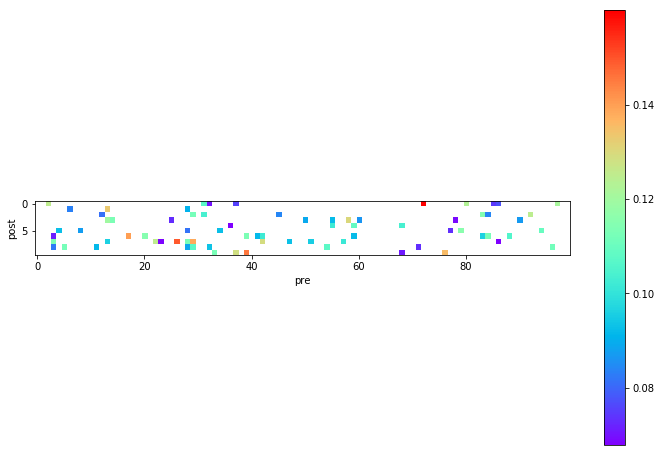

In [127]:
data = np.load('./run_results/data_gen0_ind0.npz')
print(data.keys())
ws = data['weights'].item()['mushroom to output']
print(len( ws ))
print(len( ws[0]))
npre = min(100, len(ws))
npost = len(ws[0])
img = np.ones((npre, npost)) * np.nan
for i, r in enumerate(ws[:npre]):
    img[i, :] = r

plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(img.T, cmap='rainbow')
ax.set_xlabel('pre')
ax.set_ylabel('post')
plt.colorbar(im)
plt.show()

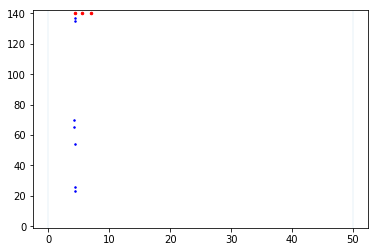

In [11]:
data = np.load('./run_results/data_gen0_ind0.npz')
recordings = data['recs'].item()
out_spikes = recordings['output'][0]['spikes']
iout_spikes = recordings['inh_output'][0]['spikes']
n_out = data['params'].item()['sim']['output_size']
n_test = data['params'].item()['sim']['test_per_class']
n_classes = data['params'].item()['sim']['num_classes']
n_out_per_class = n_out // n_classes
dt = data['params'].item()['sim']['sample_dt']
end_t = 100
start_t = 0

plt.figure()
ax = plt.subplot(1, 1, 1)
for t in range(start_t, end_t, int(dt)):
    plt.axvline(t, linewidth=0.1)
    
for i, times in enumerate(out_spikes):
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.b', markersize=3)

for times in iout_spikes:
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1), '.r', markersize=5)

ax.set_ylim(-1, n_out+2)
plt.show()

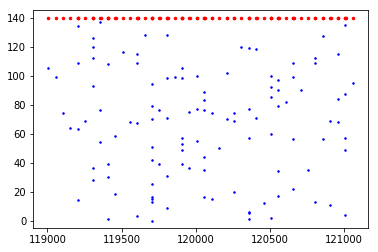

In [35]:
data = np.load('./run_results/data_gen0_ind0.npz')
recordings = data['recs'].item()
out_spikes = recordings['output'][0]['spikes']
iout_spikes = recordings['inh_output'][0]['spikes']
n_out = data['params'].item()['sim']['output_size']
n_test = data['params'].item()['sim']['test_per_class']
n_classes = data['params'].item()['sim']['num_classes']
n_out_per_class = n_out // n_classes
dt = data['params'].item()['sim']['sample_dt']
end_t = data['params'].item()['sim']['duration']
start_t = end_t - n_classes * n_test * dt

plt.figure()
ax = plt.subplot(1, 1, 1)

for i, times in enumerate(out_spikes):
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.b', markersize=3)

for times in iout_spikes:
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1), '.r', markersize=5)

ax.set_ylim(-5, n_out+5)


plt.show()

In [25]:
l = [1, 2, 3]
l *= 3
l + [5, 5]

[1, 2, 3, 1, 2, 3, 1, 2, 3, 5, 5]

In [26]:
from collections import OrderedDict
x = OrderedDict({1: 10, 2: 20, 3: 30, 9: 90})
for kx in x:
    print(kx)

1
2
3
9


In [27]:
np.repeat([1, 2, 3], 5)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f7521267278>)
['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'd', 'D', 'P', 'X', '+']


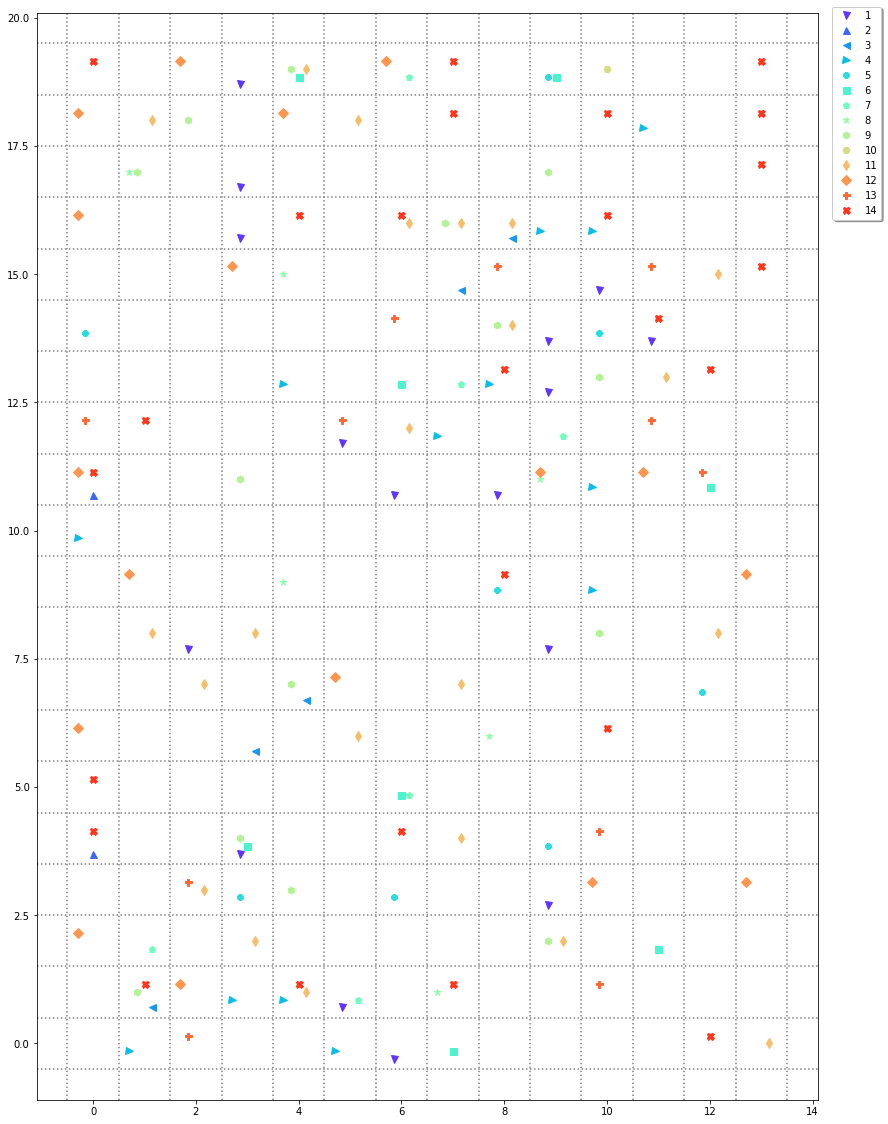

3.065600898415484


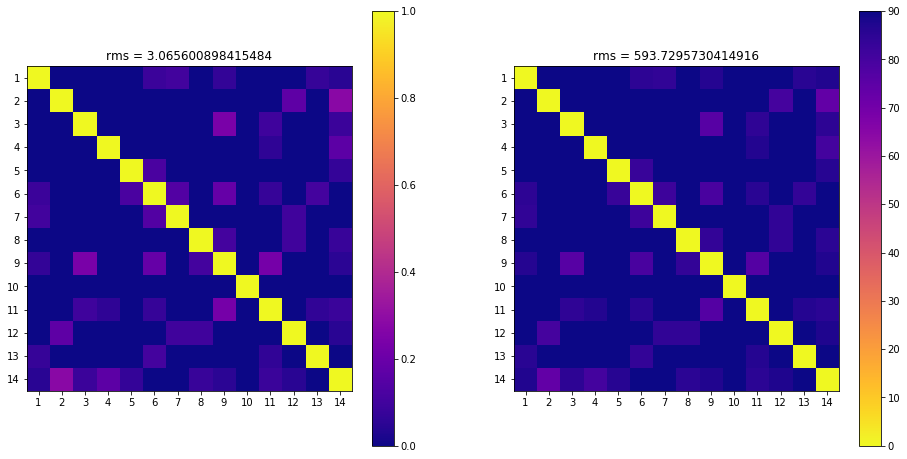

In [7]:
def spiking_per_class(indices, spikes, start_t, end_t, dt):
    neurons_per_class = {u: {} for u in np.unique(indices)}
    et = 0
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        class_idx = int((st-start_t)//dt)
        cls = int(indices[class_idx])
        for nid, ts in enumerate(spikes):
            times = np.array(ts)
            whr = np.where(np.logical_and(st <= times, times < et))[0]
            if len(whr):
                narray = neurons_per_class[cls].get(nid, None)
                if narray is None:
                    narray = times[whr]
                else:
                    narray = np.append(narray, times[whr])

                neurons_per_class[cls][nid] = narray

    return neurons_per_class

base_dir = './L2L-OMNIGLOT/run_results/'
fname = os.path.join(base_dir, 'data_gen0_ind0.npz')
data = np.load(fname, allow_pickle=True)
print(data.keys())
n_out = data['params'].item()['sim']['output_size']
n_test = data['params'].item()['sim']['test_per_class']
n_classes = data['params'].item()['sim']['num_classes']
n_out_per_class = n_out // n_classes
dt = data['params'].item()['sim']['sample_dt']
recordings = data['recs'].item()
out_spikes = recordings['output'][0]['spikes']
labels = data['input'].item()['labels']
end_t = data['params'].item()['sim']['duration']
start_t = end_t - n_classes * n_test * dt
npc = spiking_per_class(labels, out_spikes, start_t, end_t, dt)
# pprint(npc)



from matplotlib.lines import Line2D
# markers = [m for m in Line2D.filled_markers ]
markers = [
    u'o', u'v', u'^', u'<', u'>', u'8', u's', u'p', u'*', 
    u'h', u'H', u'd', u'D', u'P', u'X', u'+',
]
# markers = ['o', 'v', '<', 's', 'P', '*', 'X', 'D', 'H', '>'] * 2

# markers = ["$%s$"%s for s in "abcdefghijklmnopqrst"]

# gr = matplotlib.cm.nipy_spectral
gr = matplotlib.cm.rainbow
cmap_dc = gr.N//(n_classes+1)
cmap = np.array([gr(i*cmap_dc) for i in range(n_classes+1)] )
cmap[:, 3] = 1.0
sqr_nclass = np.ceil(np.sqrt(n_classes))
print(markers)
plt.figure(figsize=(n_classes, n_out_per_class))
ax = plt.subplot(1, 1, 1)

for x in range(n_classes + 1):
    plt.axvline(x-0.5, color='gray', linestyle=':')

for y in range(n_out_per_class + 1):
    plt.axhline(y-0.5, color='gray', linestyle=':')
    
for cls, spikes in npc.items():
    mrk = markers[cls % len(markers)]
    clr = cmap[cls]
    first_plot = True
    for nid in spikes:
        y = nid // n_classes
        x = nid % n_classes
        
        dx = 0.15*((cls % sqr_nclass) - (sqr_nclass/2.0)) #* (1.5/float(n_classes))
        dy = 0.15*((cls // sqr_nclass) - (sqr_nclass/2.0)) #* (1.5/float(n_classes))

        
        if first_plot:
            label = cls
            first_plot = False
        else:
            label = None
        plt.plot(x+dx, y+dy, marker=mrk, markerfacecolor=clr, markersize=7,
                 markeredgecolor=clr, markeredgewidth=1, label=label, linestyle='none')

ax.set_xlim(-1.1, n_classes + 0.1)
ax.set_ylim(-1.1, n_out_per_class + 0.1)
plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.01), shadow=True, ncol=1)
plt.show()
# npc


cmap = 'plasma'
vectors = [np.zeros(n_classes*n_out_per_class) for _ in npc]
for c in npc:
    vectors[c-1][list(npc[c].keys())] = 1
    
dots = np.asarray([[np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y)) for x in vectors] for y in vectors])
angles = np.asarray([[np.degrees(np.arccos(d)) if d < 0.999 else 0.0 for d in dots_row  ] for dots_row in dots])

dtriu = [np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)) \
         for ix, x in enumerate(vectors) for iy, y in enumerate(vectors) if ix > iy]
print(np.sum(dtriu))
# for l in dtriu:
#     print(len(l), l)


fw = 8.0
plt.figure(figsize=(2*fw, fw))
ax = plt.subplot(1, 2, 1)
ax.set_title('sum of cos = {}'.format(np.sum(dtriu)))
im = plt.imshow(dots, cmap=cmap, vmin=0.0, vmax=1.0)
ax.set_xticks(np.arange(n_classes))
ax.set_xticklabels(np.arange(1, n_classes+1, dtype='int'))
ax.set_yticks(np.arange(n_classes))
ax.set_yticklabels(np.arange(1, n_classes+1, dtype='int'))
plt.colorbar(im)

ax = plt.subplot(1, 2, 2)
ax.set_title('rms = {}'.format( np.mean((90.0-angles)**2) ))
im = plt.imshow(angles, cmap=cmap+'_r', vmin=0.0, vmax=90.0)
ax.set_xticks(np.arange(n_classes))
ax.set_xticklabels(np.arange(1, n_classes+1, dtype='int'))
ax.set_yticks(np.arange(n_classes))
ax.set_yticklabels(np.arange(1, n_classes+1, dtype='int'))
plt.colorbar(im)

plt.show()


In [26]:
# npc
import scipy as sp
from scipy.special import comb

comb(np.arange(10)+1, 2)

array([  0.,   1.,   3.,   6.,  10.,  15.,  21.,  28.,  36.,  45.])

-c:6: RuntimeWarning: invalid value encountered in double_scalars


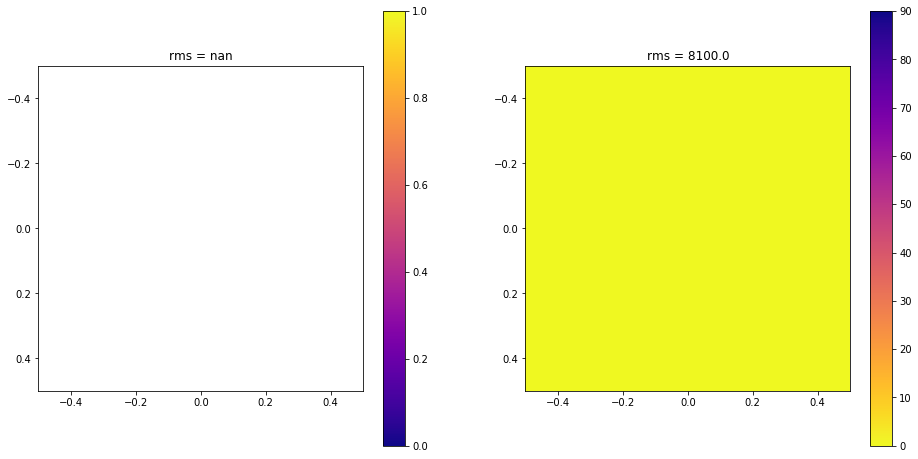

In [37]:
cmap = 'plasma'
vectors = [np.zeros(n_classes*n_out_per_class) for _ in npc]
for c in npc:
    vectors[c-1][npc[c].keys()] = 1
    
dots = np.asarray([[np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y)) for x in vectors] for y in vectors])
angles = np.asarray([[np.degrees(np.arccos(d)) if d < 0.999 else 0.0 for d in dots_row  ] for dots_row in dots])

fw = 8.0
plt.figure(figsize=(2*fw, fw))
ax = plt.subplot(1, 2, 1)
ax.set_title('rms = {}'.format( np.mean((1.0 - dots)**2) ))
im = plt.imshow(dots, cmap=cmap, vmin=0.0, vmax=1.0)
plt.colorbar(im)

ax = plt.subplot(1, 2, 2)
ax.set_title('rms = {}'.format( np.mean((90.0-angles)**2) ))
im = plt.imshow(angles, cmap=cmap+'_r', vmin=0.0, vmax=90.0)
plt.colorbar(im)

plt.show()

In [38]:
data = np.load('./run_results/data_gen0_ind0.npz')
n_post = int(data['params'].item()['ind']['n_pi_divs'])
weights = data['weights'].item()
print(weights.keys())
wgabor = weights['input to gabor']
# print(wgabor)
for lyr in wgabor.keys()[:1]:
    for r in wgabor[lyr].keys()[:1]:
        for c in wgabor[lyr][r].keys()[:1]:
            img = [np.zeros((28, 28, 3)) for _ in range(n_post)]

            for x in wgabor[lyr][r][c]:
                ch = 0 if x == u'inh' else 1
#                 if x == u'exc':
#                     continue
                print(lyr, r, c, x, ch, len(wgabor[lyr][r][c][x]))
#                 print(wgabor[lyr][r][c][x])
                for pre, ws in enumerate(wgabor[lyr][r][c][x]):
                    for post, w in enumerate(ws):
                        if not np.isnan(w):
                            img[post][pre//28, pre%28, ch] = np.abs(w)
            
            plt.figure(figsize=(n_post*2.5, 2))
            for post in range(n_post):
                ax = plt.subplot(1, n_post, post + 1)
                max_v = np.max(np.abs(img[post]))
                plt.imshow(img[post]/max_v)
            plt.show()

[u'mushroom to output']


KeyError: 'input to gabor'

In [158]:
np.arccos(0.0)

1.5707963267948966

In [112]:
_w = 3
_h = 2
_d = 2

cs = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [0, 2, 0],
    [0, 2, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
    [1, 2, 0],
    [1, 2, 1],
]

for row, col, dep in cs:
    wd = _w*_d
    print(row * wd + col*_d + dep)

for idx in range(12):
    wd = _w*_d
    row = idx//(wd)
    col = (idx%wd)/_d
    dep = idx - row*wd - col*_d
    print([row, col, dep])

0
1
2
3
4
5
6
7
8
9
10
11
[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 1]
[0, 2, 0]
[0, 2, 1]
[1, 0, 0]
[1, 0, 1]
[1, 1, 0]
[1, 1, 1]
[1, 2, 0]
[1, 2, 1]
